# Lab 6: Graphs II

Lab associated with Module 6: Graphs II

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
import math

In [4]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Graph Preliminaries

Let us start by implementing our Node and Graph data structure to incorporate weights in the graph

In [5]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        #Adrian's suggestion:
        self.parent = None
        
        self.status = "unvisited"
        self.estD = np.inf
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        
        return False
    
    def hasNeighbor(self, v):
        
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        
        return False
    
    def getOutNeighbors(self):
        
        return self.outNeighbors
    
    def getInNeighbors(self):
        
        return self.inNeighbors
    
    def getOutNeighborsWithWeights(self):
        
        return self.outNeighbors
    
    def getInNeighborsWithWeights(self):
        
        return self.inNeighbors
    
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
    
    def addOutNeighbor(self,v,wt):
        
        self.outNeighbors.append((v,wt))
    
    def addInNeighbor(self,v,wt):
        
        self.inNeighbors.append((v,wt))
        
        
    def __str__(self):
        
        return str(self.value) 

In [6]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
        
    def addDiEdge(self, u, v, wt = 1):
        
        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):
        
        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)
        
            
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
    
    
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ", "
        ret += "\n"
        ret += "\t Edges:\n\t"
        for v in self.vertices:
            for neighbor, weight in v.outNeighbors:
                ret += f"({v} -> {neighbor}, weight: {weight}) "
        ret += "\n"
        return ret

Now that we have incorporated the weights, let us devise a plan to generate the graph

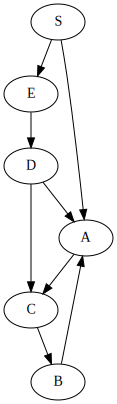

In [7]:
dot = Digraph()

dot.edge('S', 'E')
dot.edge('S', 'A')
dot.edge('E', 'D')
dot.edge('D', 'A')
dot.edge('A', 'C')
dot.edge('B', 'A')
dot.edge('D', 'C')
dot.edge('C', 'B')

#dot.view()
dot

In [8]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )

In [9]:
V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], -4)

#dot.edge('A', 'C')
#G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
#G.addDiEdge( V[3], V[5], -1)

#dot.edge('C', 'B')
#G.addDiEdge( V[5], V[4], -2 )

print(G)

Graph with:
	 Vertices:
	S, E, A, D, B, C, 
	 Edges:
	(S -> E, weight: 8) (S -> A, weight: 10) (E -> D, weight: 1) (D -> A, weight: -4) (B -> A, weight: 1) 



Second Example

In [10]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'A', 'B']:
    G.addVertex( Node(i) )
    
V = G.vertices

G.addDiEdge( V[0], V[1], 3)

G.addDiEdge( V[0], V[2] , 4)

G.addDiEdge( V[2], V[1], -2)

In [11]:
print(G)

Graph with:
	 Vertices:
	S, A, B, 
	 Edges:
	(S -> A, weight: 3) (S -> B, weight: 4) (B -> A, weight: -2) 



***

### Section 2: Dijkstra Algorithm

In [12]:
len(G.vertices)

3

In [13]:
#Initializes the dijkstra algorithm with w as the starting point and G as the graph
def dijkstra(w, G):
    
    for v in G.vertices: #For every vertex in the graph
        v.estD = math.inf #Set estimated distance to infinity
        
    w.estD = 0 #Set the estimated distance of the starting point to 0
    unsureVertices = G.vertices[:] #Create a copy of all the vertices, labelling them as unsure
    
    sureVertices = [] #Initializes an empty list of surevertices
    
    #Picks u
    while len(unsureVertices) > 0: #While there are still unsure vertices
        u = None #U is going to be used to store the vertex with the smallest estimated distance
        minD = math.inf #Initialize the minimum distance to infinity
        for x in unsureVertices:#Iterate through all the unsure vertices
            if x.estD < minD: #If the estimated distance of x is lower than minimum distance
                minD = x.estD #Set the distance of x as minimum distance
                u = x #u then references the vertex x
        
        if u == None: #If there are no unsure vertices left
            return #Exit loop
        
        #Loop through neighbouring vertices "v" and weights "wt" of vertex "u"
        for v, wt in u.getOutNeighborsWithWeights():
            if v in sureVertices: #If v is is in sureVertices list, skip it
                continue
            
            if u.estD + wt < v.estD: #Checks if the path to v through u is shorter than previously known paths of v
                v.estD = u.estD + wt #Update v's path
                v.parent = u #Set u as the parent
        
        unsureVertices.remove(u) #Remove vertex u from the unsure vertices
        sureVertices.append(u) #Add it to the sure vertices
    


In [14]:
G = Graph() #Initializes new graph
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['A', 'B', 'C']: #Adds vertices
    G.addVertex( Node(i) ) #Creates node object
    
V = G.vertices #Stores vertices in the graph into V

#Adds directed edges
G.addDiEdge( V[0], V[2], 3)
G.addDiEdge( V[1], V[2] , 9)
G.addDiEdge( V[1], V[0], 3)


w = G.vertices[0] #Set w as starting vertex
dijkstra(w, G) #Executes dijkstra's algorithm

for v in G.vertices: #Iterates through all the vertices
    print(v.value, v.estD) #Prints each vertex and their shortst distance from w

A 0
B inf
C 3


***

### <font color='red'> Activity 1: Modify above code to do Bellman-Ford. Make sure you test for negative cycles and compare its performance with Dijkstra. </font>

In [15]:
#Initializes the bellman-ford algorithm with w as the starting point and G as the graph
def bellman_ford(w, G):

    for v in G.vertices: #For every vertex in the graph
        v.estD = math.inf #Set estimated distance to infinity
        
    w.estD = 0 #Set the estimated distance of the starting point to 0

    for i in range(0, len(G.vertices) -1): #Repeat this process v-1 times where v is the number of vertices in the graph
        for u in G.vertices: #For ech vertex u in the graph
            for v, wt in u.getOutNeighbors():  #For each neighbor "v" and weight "wt" of "u"
                if u.estD != math.inf and u.estD + wt < v.estD: #If the estimated distance is not infinity and the path from u is shorter than its previous path
                    v.estD = u.estD + wt #Update v's distance with the shorter distance

    #Checks negative weight cycles
    for u in G.vertices: #For each vertex u in the graph
        for v, wt in u.getOutNeighbors(): #For each neighbour and weight of u
            if u.estD != math.inf and u.estD + wt < v.estD: #If the distance can still be updated after relaxation, there is a negative weight cycle
                print("There are negative cycles")



In [16]:
G = Graph()
for i in ['A', 'B', 'C', 'D']:
    G.addVertex(Node(i))

V = G.vertices
G.addDiEdge(V[0], V[1], 4)  
G.addDiEdge(V[1], V[2], 4) 
G.addDiEdge(V[2], V[3], 2) 

# Run Bellman-Ford algorithm
bellman_ford(V[0], G)

# Print the results
for v in G.vertices:
    print(v.value, v.estD)

A 0
B 4
C 8
D 10


In [17]:
G = Graph()
for i in ['A', 'B', 'C', 'D']:
    G.addVertex(Node(i))

V = G.vertices

# Adding edges to the graph
G.addDiEdge(V[0], V[1], 4)  
G.addDiEdge(V[1], V[2], 4)  
G.addDiEdge(V[2], V[3], 2)   
G.addDiEdge(V[3], V[1], -10) 


bellman_ford(V[0], G)

for v in G.vertices:
    print(v.value, v.estD)


There are negative cycles
A 0
B -8
C 0
D 2


***

### <font color='red'> Activity 2: Implement Floyd-Warshal algorithm using above data structure (that is Node and Graph). Make sure to test all the use-cases. </font>

In [21]:
import numpy as np

# Part 1: (Initialization of your D matrix)
def floyd_warshall(G):
    n = len(G.vertices)
    
    # Initialize the distance and parent table (matrix)
    distance = np.full((n, n), np.inf)  #Fill the nxn matrix with infinity
    np.fill_diagonal(distance, 0)  #Set the main diagonal to 0
    
    parents = np.full((n, n), -1)  #Use -1 to indicate no parent for any vertex initially
    
    # Set initial distances and parents from the graph's direct connections
    for u in range(n): #Iterate through each vertex in the graph
        for v, wt in G.vertices[u].getOutNeighborsWithWeights(): #For each vertex, get outs its neighbours with weights
            u_index = G.vertices.index(G.vertices[u]) #Find index of u
            v_index = G.vertices.index(v) #Find index of v
            distance[u_index, v_index] = wt #Set the distance between u and v to its edge weight
            parents[u_index, v_index] = u_index #Set the parent of v to u

    # Part 2: (Use of DP to solve the problem)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                # Implementing the Floyd-Warshall DP equation
                if distance[i, j] > distance[i, k] + distance[k, j]:
                    distance[i, j] = distance[i, k] + distance[k, j]
                    parents[i, j] = parents[k, j]  

                    
    # Part 3: Determine if there are negative cycles
    for i in range(n): #Iterates through all the vertices
        if distance[i, i] < 0:  # If the distance from a vertex to itself is negative. There is a negative cycle
            print("Negative cycle detected")
            return None

   # Part 4: Print out the Path
    def print_path(start_index, end_index, parents):
        path = [] #Initialize an empty list to store the path
        current = end_index #Start form end vertex

        #Constructs a path from end_index to start_index using parents
        while current != -1 and current != start_index: #Traverse backwards until we reach the start or no path
            path.append(G.vertices[current].value) #Add the current vertex to the path
            current = parents[start_index, current] #Move to the parent of the current vertex in the path

        if current == -1: #If theres no path left print no path
            print("No path", end='')
        else:
            path.append(G.vertices[start_index].value) #Add the start vertex to the path
            path.reverse() #Reverse the list
            print(" -> ".join(path), end='') #Print the path with arrows

    # Output the results
    print("\nShortest paths between all pairs of vertices:")
    for i in range(n):
        for j in range(n):
            print(f"Shortest path from {G.vertices[i].value} to {G.vertices[j].value}: ", end='')
            if distance[i, j] == np.inf:
                print("No path", end='')
            else:
                print_path(i, j, parents)
                print(f" (Distance: {distance[i, j]})")

    # Return distance and parents matrix
    return distance, parents

In [22]:
# Create a graph and add vertices and edges
G = Graph()
for i in ['A', 'B', 'C', 'D', 'E']:
    G.addVertex(Node(i))

V = G.vertices
G.addDiEdge(V[0], V[1], 1)
G.addDiEdge(V[1], V[2], 1)
G.addDiEdge(V[2], V[3], 1)
G.addDiEdge(V[3], V[4], 1)

# Run Floyd-Warshall algorithm
distnce, parents = floyd_warshall(G)


Shortest paths between all pairs of vertices:
Shortest path from A to A: A (Distance: 0.0)
Shortest path from A to B: A -> B (Distance: 1.0)
Shortest path from A to C: A -> B -> C (Distance: 2.0)
Shortest path from A to D: A -> B -> C -> D (Distance: 3.0)
Shortest path from A to E: A -> B -> C -> D -> E (Distance: 4.0)
Shortest path from B to A: No pathShortest path from B to B: B (Distance: 0.0)
Shortest path from B to C: B -> C (Distance: 1.0)
Shortest path from B to D: B -> C -> D (Distance: 2.0)
Shortest path from B to E: B -> C -> D -> E (Distance: 3.0)
Shortest path from C to A: No pathShortest path from C to B: No pathShortest path from C to C: C (Distance: 0.0)
Shortest path from C to D: C -> D (Distance: 1.0)
Shortest path from C to E: C -> D -> E (Distance: 2.0)
Shortest path from D to A: No pathShortest path from D to B: No pathShortest path from D to C: No pathShortest path from D to D: D (Distance: 0.0)
Shortest path from D to E: D -> E (Distance: 1.0)
Shortest path from 

***

***

In [23]:
# Create a graph and add vertices and edges
G = Graph()
for i in ['A', 'B', 'C', 'D']:
    G.addVertex(Node(i))

V = G.vertices
G.addDiEdge(V[0], V[1], 4)  
G.addDiEdge(V[1], V[2], 4)  
G.addDiEdge(V[2], V[3], 2)   
G.addDiEdge(V[3], V[1], -10) 

# Run Floyd-Warshall algorithm
distnce, parents = floyd_warshall(G)

Negative cycle detected


TypeError: cannot unpack non-iterable NoneType object